In [9]:
import numpy as np
from sympy import init_printing
init_printing()
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")

In [10]:
def call_price(sigma, S, K, r, t):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)
    C = np.multiply(S, norm.cdf(d1)) - \
        np.multiply(norm.cdf(d2) * K, np.exp(-r * t))
    return C, d1, d2

In [11]:
def put_price(sigma, S, K, r, t):
    d1 = np.multiply( 1. / sigma * np.divide(1., np.sqrt(t)),
        np.log(S/K) + (r + sigma**2 / 2.) * t  )
    d2 = d1 - sigma * np.sqrt(t)
    P = -np.multiply(S, norm.cdf(-d1)) + \
        np.multiply(norm.cdf(-d2) * K, np.exp(-r * t))
    return P

In [12]:
def bachelier(sigma, S, K, r, t):
    d = (S - K) / (sigma * np.sqrt(t))
    C = np.exp(-r * t) * (S - K) * norm.cdf(d) + \
        np.exp(-r * t) * sigma * np.sqrt(t) * norm.pdf(d)
    return C

In [13]:
t = 1 / 12    #  Time to expiration
sigma = 0.20    #  Black Scholes implied volatility
K = 105         #  Strike Price
r = 0.01        #  Risk-free rate
S = np.linspace(90, 110, 100)    # Let our stock price range between $90 and $110
#  Calculate Black Schole call, put price
C_BlackSholes, d1, d2 = call_price(sigma, S, K, r, t)
P_BlackSholes = put_price(sigma, S, K, r, t)

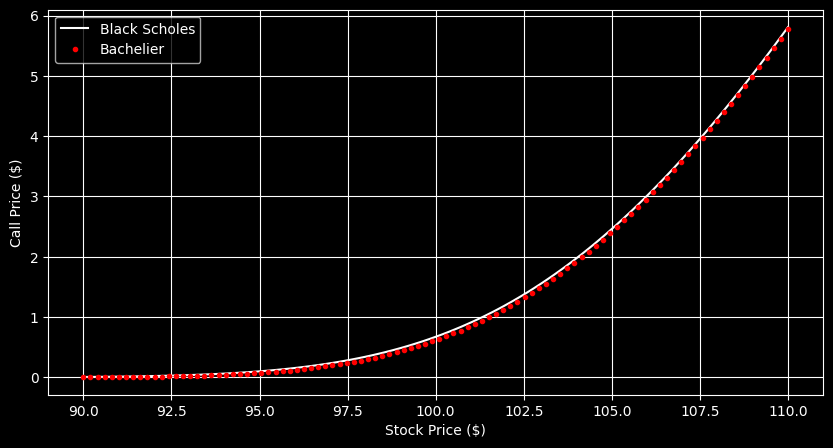

In [14]:
C_ba = bachelier(sigma * S, S, K, r, t)
plt.figure(figsize=(10,5))
plt.plot(S, C_BlackSholes, 'w', label = 'Black Scholes')
plt.plot(S, C_ba, 'r.', label = 'Bachelier')
plt.grid(True)
plt.legend()
plt.xlabel('Stock Price ($)')
plt.ylabel('Call Price ($)')
plt.show()


In [15]:
#  Calculate Bachelier call price
C_Bachelier = bachelier(sigma * S, S, K, r, t)
#Use put-call parity to calculate put price
P_Bachelier = C_Bachelier - S + np.exp(-r * t) * K

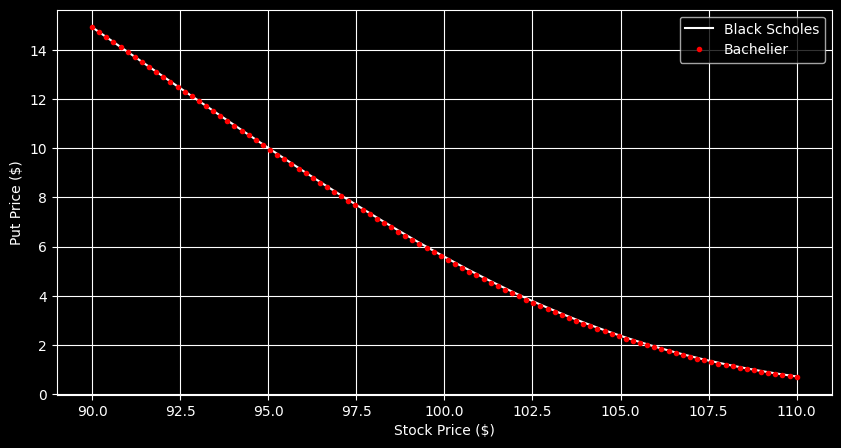

In [16]:
#  Plot the results
plt.figure(figsize=(10,5))
plt.plot(S, P_BlackSholes, 'w', label = 'Black Scholes')
plt.plot(S, P_Bachelier, 'r.', label = 'Bachelier')
plt.grid(True)
plt.legend()
plt.xlabel('Stock Price ($)')
plt.ylabel('Put Price ($)')
plt.show()